<a href="https://colab.research.google.com/github/kartikparlikar/Netflix-Data_Analysis_using_Python/blob/main/EDA_ON_NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

In [166]:
df.shape

(8807, 12)

In [167]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [169]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [170]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [171]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [172]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [173]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [174]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [175]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [176]:
df['date_added'].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1714, dtype: int64

In [177]:
df['country'].fillna('Not Specify',inplace = True) # fill with Others
df['director'].fillna('Others',inplace = True)# fill with Others
df['cast'].fillna('Others',inplace = True)# fill with Others
# df['date_added'].fillna('Others',inplace = True)# fill with Others
df['rating'].fillna(df['rating'].mode()[0],inplace = True) # fill ratings with mode
df['duration'].fillna(df['duration'].mode()[0],inplace = True) # fill duration with mode
df = df.dropna()

In [178]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [179]:
df.isnull().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [180]:
df.shape

(8797, 12)

<Axes: xlabel='type', ylabel='count'>

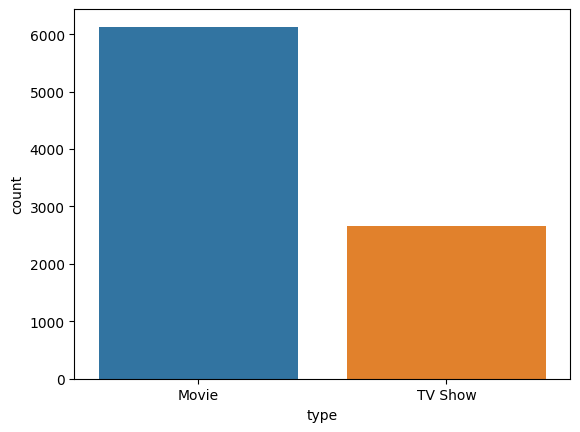

In [181]:
sns.countplot(x='type', data=df)



```
# It shows the number of Movies and TV shows present in the dataset. The plot shows that there are more Movies than TV shows in the dataset.
```





<Axes: xlabel='rating', ylabel='count'>

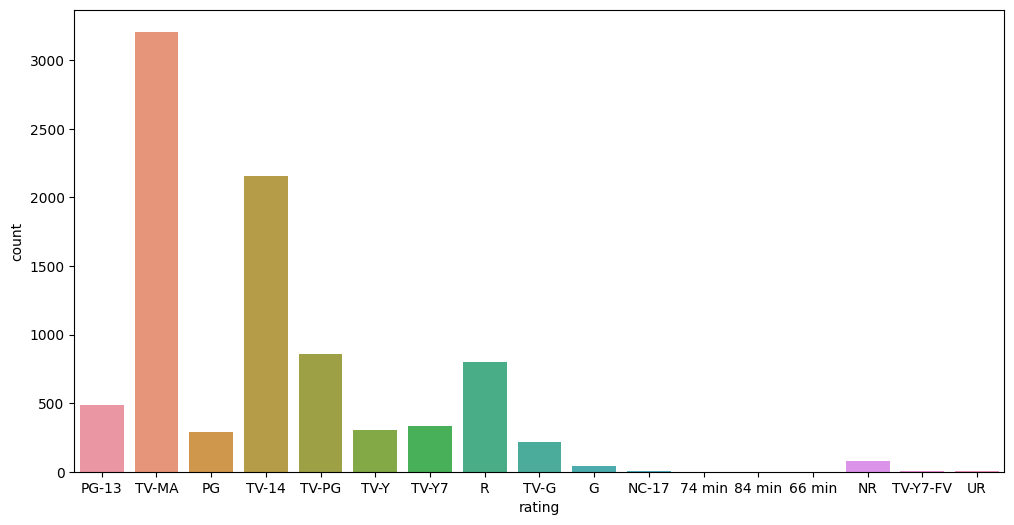

In [182]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df)



```
The second output is a count plot of the ‘rating’ column of the ‘df’ DataFrame.
It shows the number of occurrences of each unique value in the ‘rating’ column.
The plot shows that the most frequent rating in the dataset is TV-MA, followed by TV-14 and TV-PG.
```



Text(0.5, 1.0, 'Comparison of type and rating')

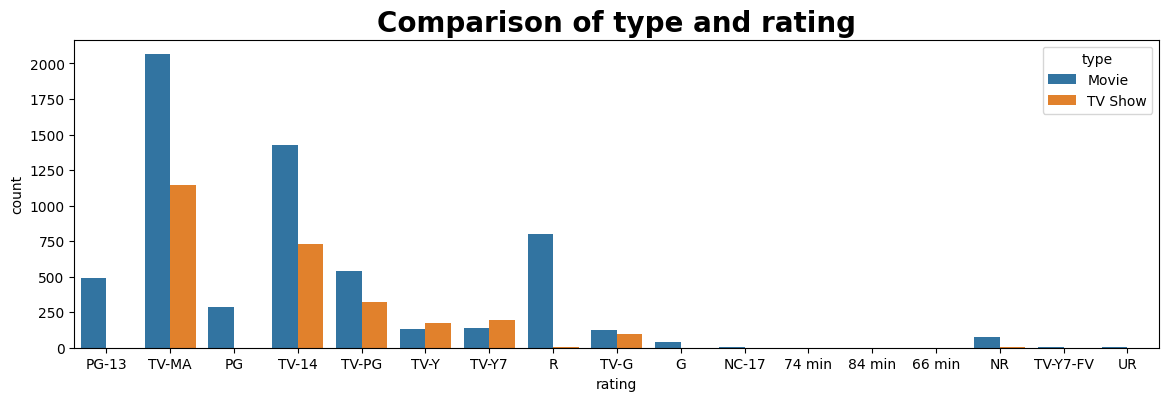

In [183]:
plt.figure(figsize=(14, 4))
sns.countplot(x='rating', hue = 'type', data=df)
plt.title("Comparison of type and rating",fontweight="bold", size=20)




```
This plot shows the number of occurrences of each unique value in the ‘rating’ column, broken down by the type of content (i.e., Movie or TV show).
This plot allows us to see how the distribution of ratings differs between Movies and TV shows. We can see that the rating TV-MA is more common in TV 
shows than in Movies, while the rating PG-13 is more common in Movies than in TV shows.
```



In [184]:
df['country'].value_counts().sort_values(ascending=False).head(10)

United States     2812
India              972
Not Specify        830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 Realeasing Country')

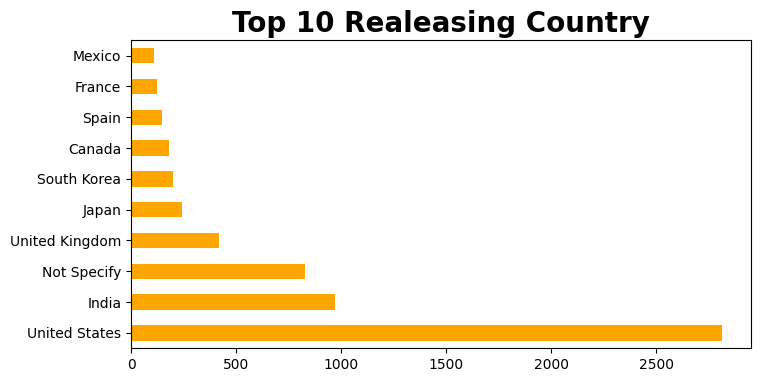

In [185]:
plt.figure(figsize=(8,4))
df['country'].value_counts().sort_values(ascending=False)[:10].plot(kind="barh",color="Orange")
plt.title('Top 10 Realeasing Country',fontweight="bold", size=20)


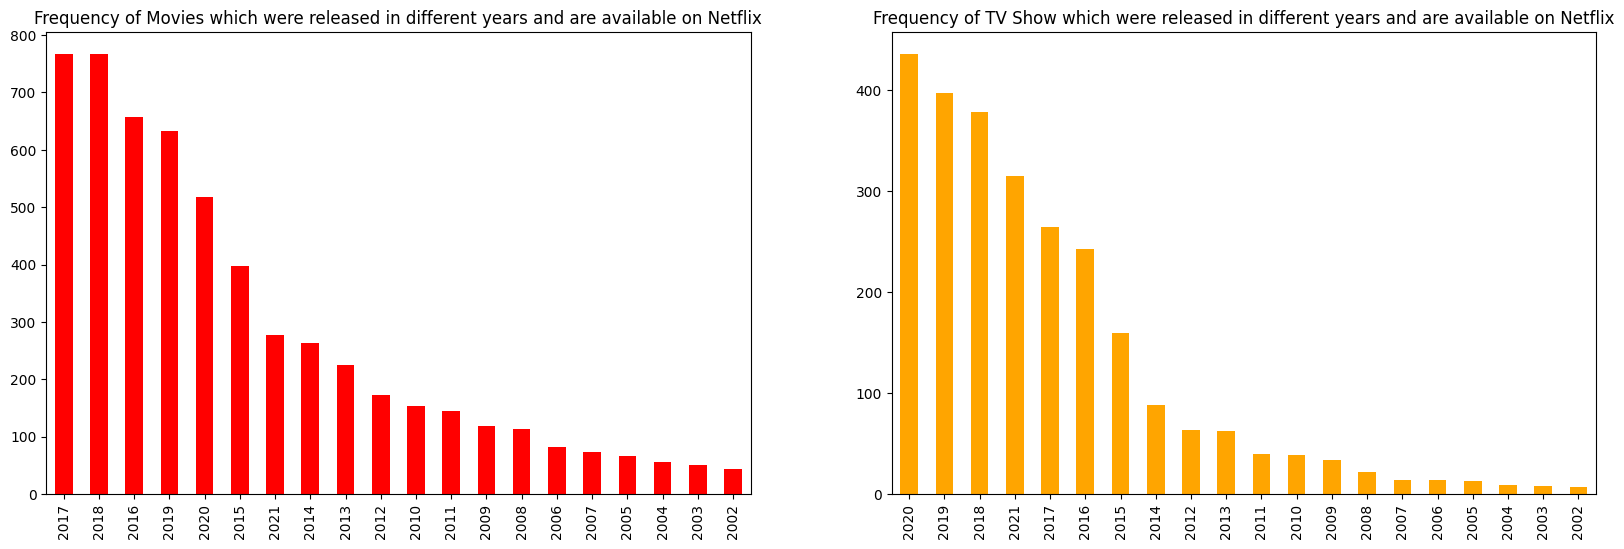

In [186]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1 )
df[df["type"]=="Movie"]['release_year'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

plt.subplot(1,2,2 )
df[df["type"]=="TV Show"]['release_year'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="Orange")
plt.title("Frequency of TV Show which were released in different years and are available on Netflix")
plt.show()



```
This bar plot's shows the frequency of Movies & TV Shows released in different years and available on Netflix.
The plot shows the 20 most common years for Movies in the dataset
```



Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

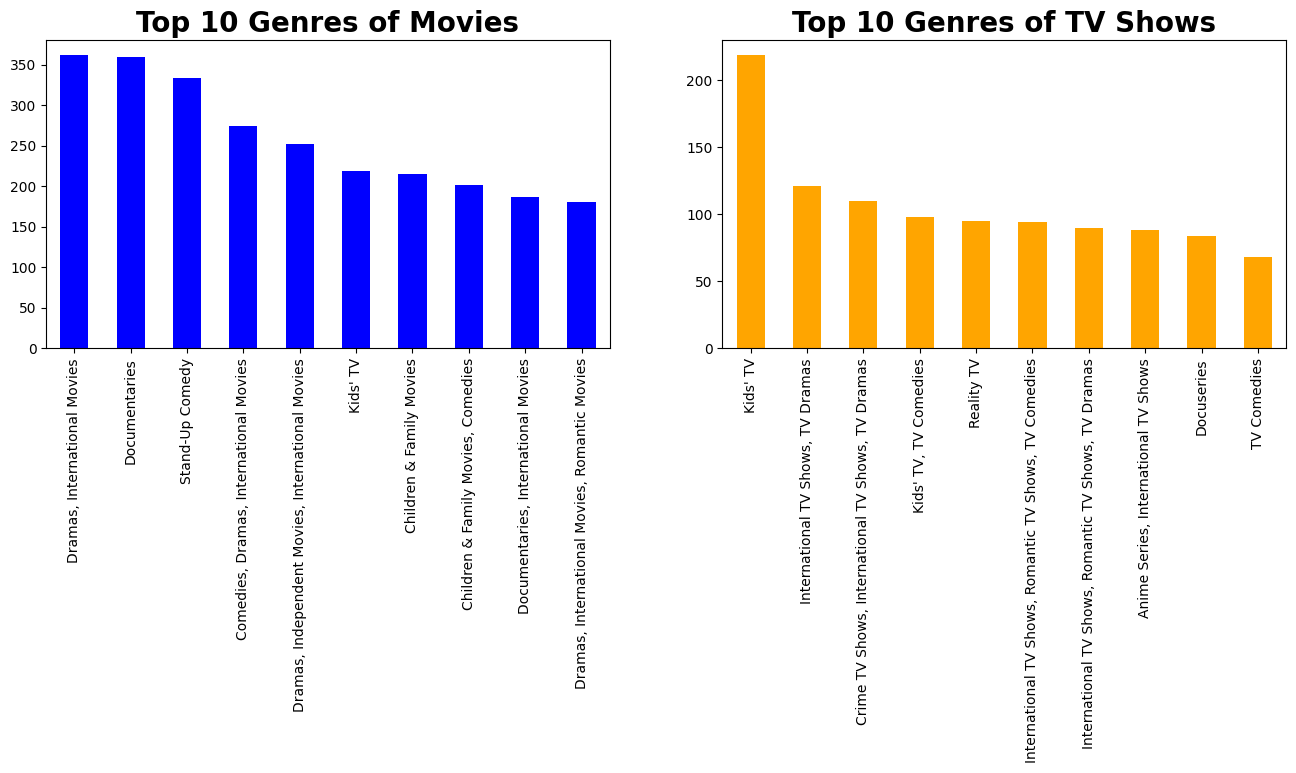

In [187]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1 )
df['listed_in'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar",color="blue")
plt.title("Top 10 Genres of Movies",fontweight="bold", size=20)

plt.subplot(1,2,2 )
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="bar",color="Orange")
plt.title("Top 10 Genres of TV Shows",fontweight="bold", size=20)




```
These bar plots show the top 10 genres of Movies & TV Shows in the dataset.
```



In [188]:
actors = df['cast'].str.split(',',expand=True).stack()
actors= pd.DataFrame(actors)
actors.columns = ['cast']
top_actors = actors.groupby(['cast']).size().reset_index(name='counts')
top_actors = top_actors.sort_values(by='counts',ascending=False)
top_actors = top_actors[top_actors['cast'] != 'Others']
top_actors = top_actors.head(10)
top_actors

,cast,counts
2609,Anupam Kher,39
26913,Rupa Bhimani,31
30273,Takahiro Sakurai,30
15526,Julie Tejwani,28
23600,Om Puri,27
25384,Rajesh Kava,26
38411,Shah Rukh Khan,26
33334,Yuki Kaji,25
23932,Paresh Rawal,25
1903,Andrea Libman,25




```
the top 5 actors with the most number of movies. The list includes 
Anupam Kher, Rupa Bhimani, Takahiro Sakurai, Julie Tejwani, and Om Puri.
```



<Axes: >

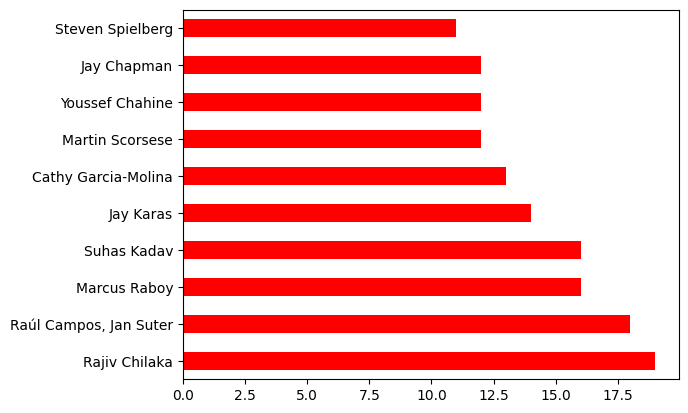

In [189]:
df[df['director']!= 'Others']['director'].value_counts()[:10].plot(kind="barh",color="red")



```
top 10 directors with the most number of movies. and this are Top 5 list includes 
Rajiv Chilaka, Raúl Campos, Jan Suter, Marcus Raboy and Suhas Kadav
```



In [190]:
df['year'] = pd.to_datetime(df['date_added']).dt.strftime('%Y')

In [191]:
x = df.groupby(['year','type',])['rating'].count().reset_index()


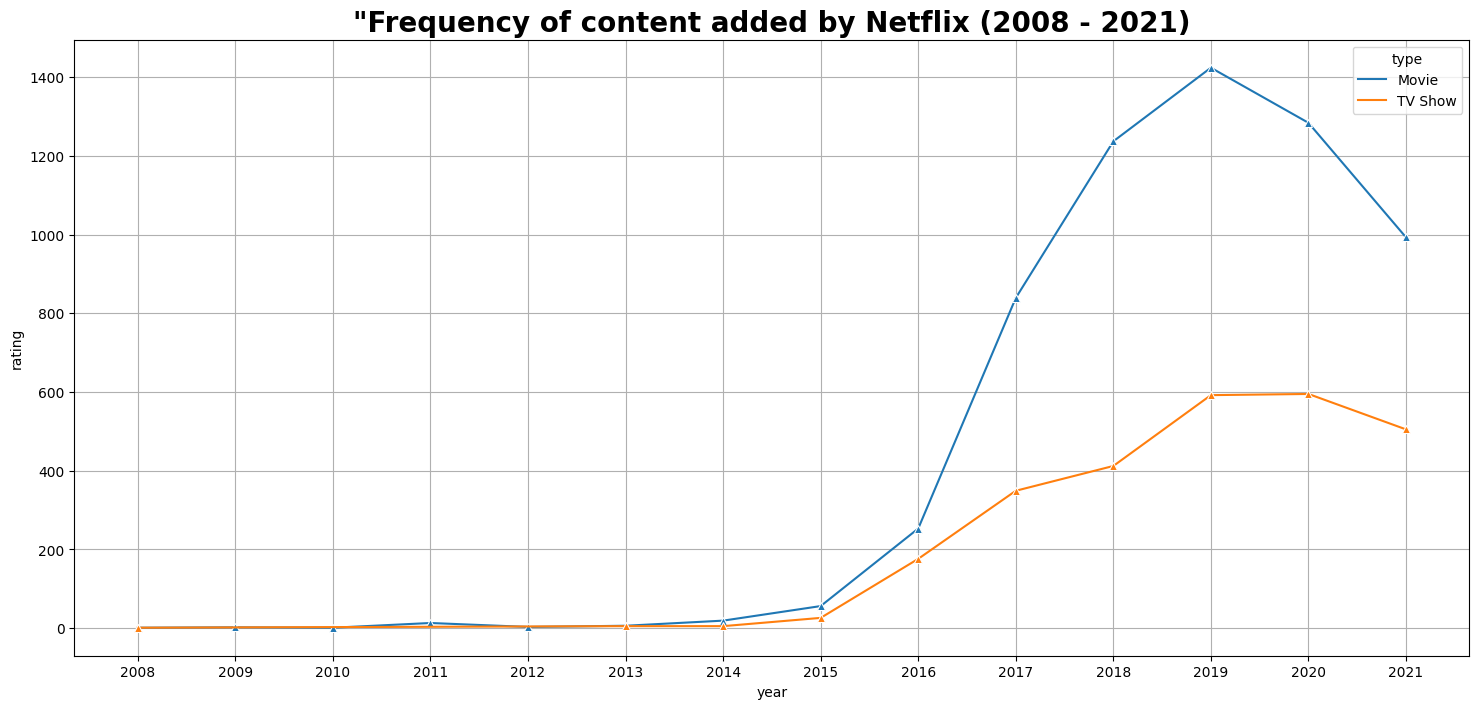

In [192]:
plt.figure(figsize=(18,8))
sns.lineplot(data = x, x = 'year', y = 'rating', hue = 'type',sort =True, marker ='^')
plt.title('"Frequency of content added by Netflix (2008 - 2021)',fontweight ='bold',size =20)
plt.grid()
plt.show()



```
we can see the frequency of content added by Netflix from 2008 to 2021. The plot shows that there has been a steady increase in the number
of titles added each year, with a notable jump in 2015. We can also see that the number of movies added has generally been higher than the 
number of TV shows added each year.
```

